<h1>Stock Market Prediction</h1>
After Stock market analysis, lets start with stock market prediction.
For Stock market Prediction we will be using different algorithms and models. In this notebook we will be trying to fit our data in different models.
Various models, toolkits and algorithms used in this notebook are K-Nearest Neighbours, FBProphet, Auto-Arima and LSTM.
In this Notebook we will be trying to predict the stock prices in upcoming days and a indicator that will show us on which days the stock prices will go up or down.

In [1]:
#for k-nearest neighbours
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

from stocker import Stocker #for stocker toolkit

from pyramid.arima import auto_arima #for ARIMA

#for LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#for importing stock data files
import file_import
#for Dataframe
import pandas as pd
#for Date and Time objects
import datetime
#for spliting the data into testing and training dataset
from sklearn.model_selection import train_test_split
#Matplotlib for ploting graphs
import matplotlib.pyplot as plt
import numpy as np
import call_api

/home/yuvraj/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/home/yuvraj/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.

/home/yuvraj/.local/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning:


    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information

Starting with importing stock data into a Pandas Dataframe object

In [2]:
data, lis, file_name = file_import.operate_file() #Here data holds the stock data
up_data = call_api.data_update(data, file_name, lis[0])
data = pd.concat([data, up_data], sort = True)
stock_name = lis[0]
start_date = lis[1]
end_date = lis[2]
data = data.drop(['1. open','2. high','3. low','4. close','5. volume','OpenInt'], axis = 1)
print("Lets us see the first 10 rows of the %s stock\n\n"%(stock_name),data)

Lets us see the first 10 rows of the msft stock

                 Close       High        Low       Open        Volume
1986-03-13    0.07533    0.07533    0.06720    0.06720  1.371331e+09
1986-03-14    0.07533    0.07533    0.07533    0.07533  4.095695e+08
1986-03-17    0.07533    0.07533    0.07533    0.07533  1.769952e+08
1986-03-18    0.07533    0.07533    0.07533    0.07533  9.006701e+07
1986-03-19    0.07533    0.07533    0.07533    0.07533  6.365552e+07
...               ...        ...        ...        ...           ...
2019-11-18  149.77500  150.16000  148.98000  150.07000  7.674262e+06
2019-11-19  150.39000  151.33000  150.19500  150.88000  2.396016e+07
2019-11-20  149.62000  150.84000  148.46000  150.31000  2.572006e+07
2019-11-21  149.48000  149.80000  148.50100  149.40000  1.857608e+07
2019-11-22  149.59000  150.30000  148.82000  150.07000  1.526560e+07

[8494 rows x 5 columns]


In [3]:
data.drop_duplicates( keep = False, inplace = True) 
x = 0
while(x == 0):
    y,m,d = start_date.split('-',3)
    temp_date = datetime.date(int(y),int(m),int(d))
    
    df = data.loc[start_date : end_date, : ] #Slicing the data from start date to end date
    if(len(df.index) == 0):
        print("Date Interval specified is Invalid \nPlease, Re-Enter the date in Valid format YYYY-MM-DD : \n")
        continue
    x = 1

df.index = pd.to_datetime(df.index) #Converting index to datetime object so that daily, monthly or yearly data could be taken out

After importing stock data file into a DataFrame object let us split that data into training and testing dataframes.

In [4]:
li = df.shape
x = int(li[0] - 0.2*li[0])
train = df[ : x]
valid = df[x : ]
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']
len_valid = valid.shape[0]

After splitting the data, Let us now apply machine learning algorithms and model.
<h2>K-Nearest Neighbours</h2>
One of the most interesting ML algorithm that one can use here is kNN (k nearest neighbours). Based on the independent variables, kNN finds the similarity between new data points and old data points.
<h3>Pseudo Code of KNN</h3>
We can implement a KNN model by following the below steps:
<ol>
    <li>Load the data</li>
    <li>Initialise the value of k</li>
    <li>For getting the predicted class, iterate from 1 to total number of training data points</li><ol>
        <li>Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.</li>
        <li>Sort the calculated distances in ascending order based on distance values</li>
        <li>Get top k rows from the sorted array</li>
        <li>Get the most frequent class of these rows</li>
        <li>Return the predicted class</li></ol>
</ol>

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

/home/yuvraj/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



<h3>Results</h3>

In [6]:
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print(str(rms) + "\n\n\n")

16.44820731692649





/home/yuvraj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Populating the interactive namespace from numpy and matplotlib


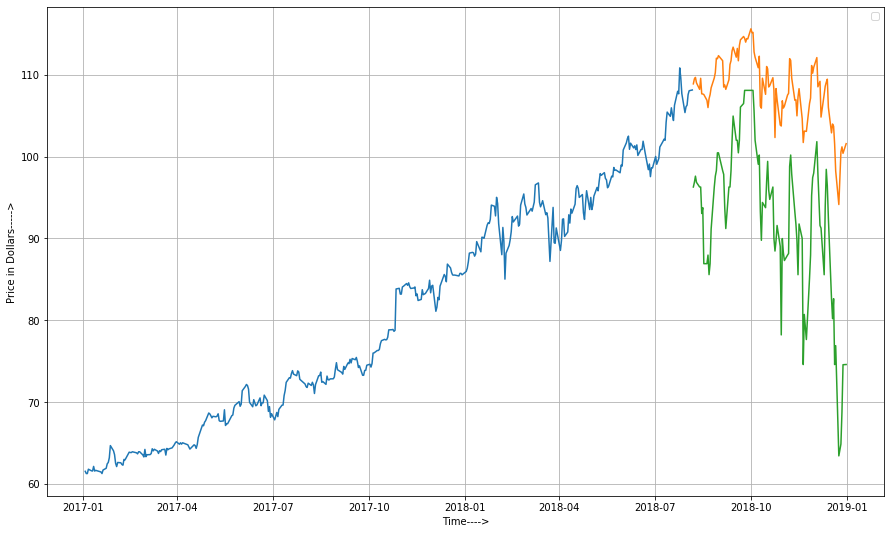

In [7]:
if('Prediction' in valid.columns):
    valid.drop('Prediction', axis = 1)
    
#ploting using matplotlib
valid['Predictions'] = preds
%matplotlib inline
%pylab inline

pylab.rcParams['figure.figsize'] = (15, 9)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.xlabel('Time---->')
plt.ylabel('Price in Dollars----->')
plt.legend()
plt.grid(True)
plt.savefig('KNN.png')

In [8]:
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print(str(rms) + "\n\n\n")

16.44820731692649





In [9]:
import simple_scaling
valid = simple_scaling.simple(data = valid)

1.1309857691908174 1.3619845792826015
1.1309857691908174
1.1409857691908174
1.1509857691908174
1.1609857691908174
1.1709857691908174


/home/yuvraj/PycharmProjects/SMAP/notebooks/simple_scaling.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Populating the interactive namespace from numpy and matplotlib


<function matplotlib.pyplot.show(*args, **kw)>

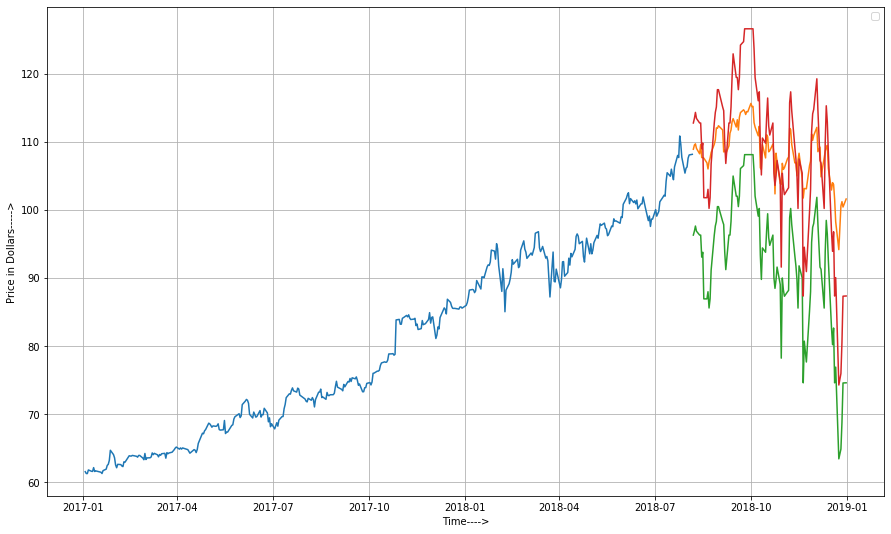

In [10]:
%matplotlib inline
%pylab inline

pylab.rcParams['figure.figsize'] = (15, 9)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions','New Predictions']])
plt.xlabel('Time---->')
plt.ylabel('Price in Dollars----->')
plt.legend()
plt.grid(True)
plt.savefig('KNNadd.png')
plt.show

In [11]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(valid['New Predictions'])),2)))
print(str(rms) + "\n\n\n")

7.42035001797832





/home/yuvraj/PycharmProjects/SMAP/notebooks/simple_scaling.py:71: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/yuvraj/.local/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/yuvraj/PycharmProjects/SMAP/notebooks/simple_scaling.py:96: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

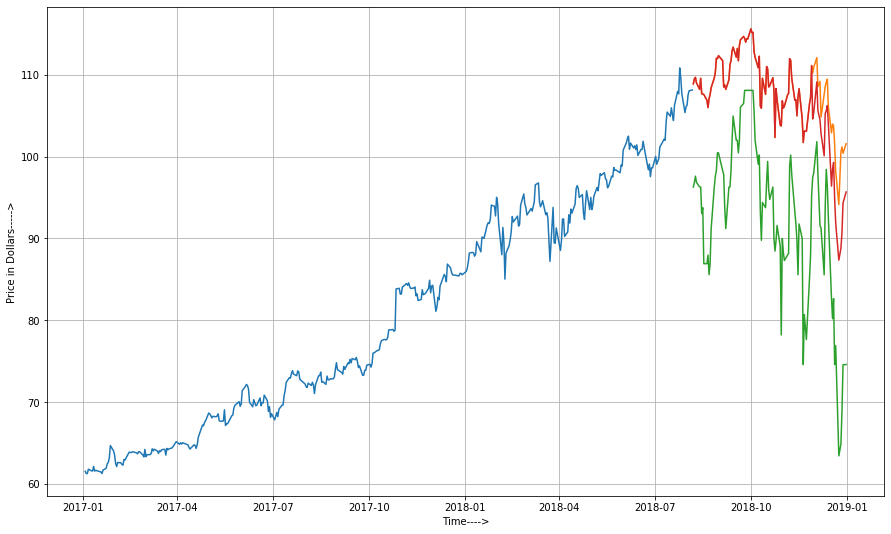

In [12]:
valid_new = simple_scaling.additive(valid)
plt.plot(train['Close'])
plt.plot(valid_new[['Close','Predictions','New Prediction']])
plt.xlabel('Time---->')
plt.ylabel('Price in Dollars----->')
plt.grid(True)
plt.savefig("KNNmul.png")
plt.show()

In [13]:
rms=np.sqrt(np.mean(np.power((np.array(valid_new["Close"])-np.array(valid_new["New Prediction"])),2)))
print(str(rms) + "\n\n\n")

2.712894445016611





<h2>Auto ARIMA</h2>
Introduction

ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:

    p (past values used for forecasting the next value)
    q (past forecast errors used to predict the future values)
    d (order of differencing)

Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error. 

In [14]:
training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=len_valid)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1181.510, BIC=1201.315, Fit time=8.126 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1430.996, BIC=1438.918, Fit time=0.058 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1341.179, BIC=1357.023, Fit time=1.270 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1181.115, BIC=1196.959, Fit time=6.624 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1182.204, BIC=1202.009, Fit time=9.349 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1421.307, BIC=1433.190, Fit time=0.152 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1181.846, BIC=1201.651, Fit time=18.572 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1180.326, BIC=1204.092, Fit time=14.537 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1181.092, BIC=1208.819, Fit time=30.136 seconds
Fit ARIMA: order=(0, 1, 0

<h3>Results</h3>

In [15]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

11.790738085724733

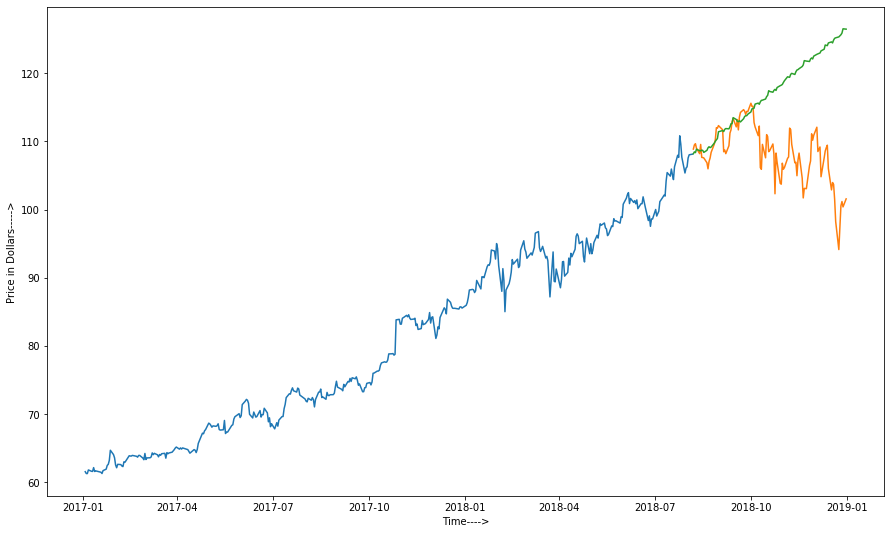

In [16]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])
plt.xlabel('Time---->')
plt.ylabel('Price in Dollars----->')
plt.savefig('arima.png')
plt.show()

<h2>Long Short Term Memory (LSTM)</h2>

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:

    The input gate: The input gate adds information to the cell state
    The forget gate: It removes the information that is no longer required by the model
    The output gate: Output Gate at LSTM selects the information to be shown as output


In [17]:
#creating dataframe
df = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(df)):
    new_data['Date'][i] = df.index[i]
    new_data['Close'][i] = df['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

li = dataset.shape
x = int(li[0] - 0.2*li[0])
train = dataset[ : x]
valid = dataset[x : ]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=3, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 9s - loss: 0.0103


In [18]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

3.286120036334769

/home/yuvraj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



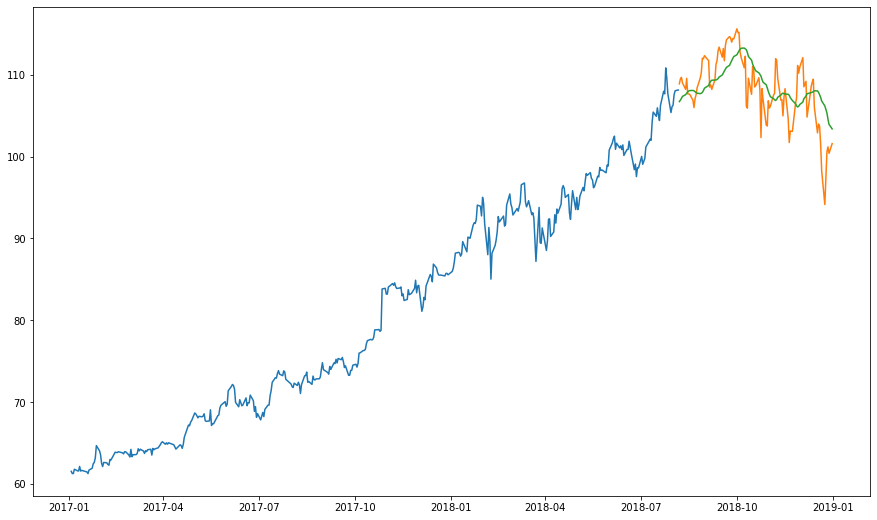

In [19]:
li = new_data.shape
x = int(li[0] - 0.2*li[0])
train = new_data[ : x]
valid = new_data[x : ]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.grid(False)
plt.savefig('lstm.png')
plt.show()

In [20]:
#creating dataframe
df = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(df)):
    new_data['Date'][i] = df.index[i]
    new_data['Close'][i] = df['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

li = dataset.shape
x = int(li[0] - 0.2*li[0])
train = dataset[ : x]
valid = dataset[x : ]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=4, batch_size=4, verbose=4)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/4
Epoch 2/4
Epoch 3/4
Epoch 4/4


In [21]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

3.2747962651423803

/home/yuvraj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



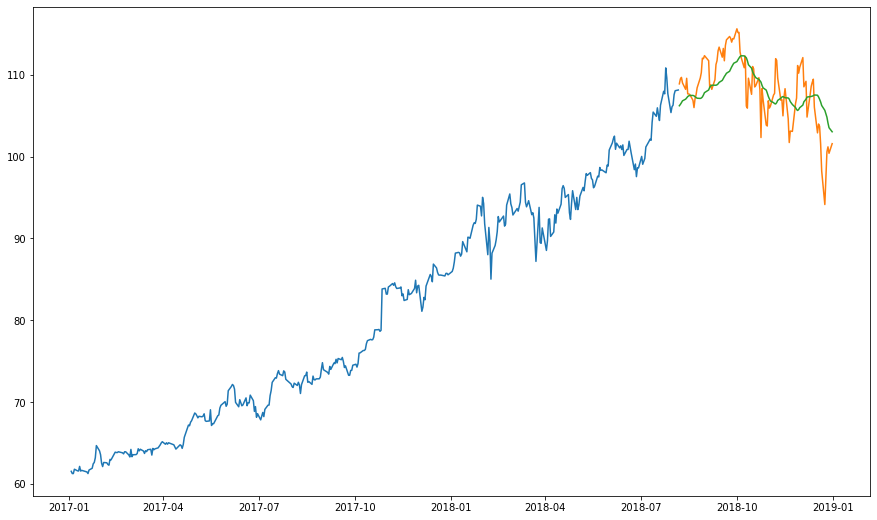

In [22]:
li = new_data.shape
x = int(li[0] - 0.2*li[0])
train = new_data[ : x]
valid = new_data[x : ]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.grid(False)
plt.savefig('LSTM2.png')
plt.show()

<h2>Begin with Stocker</h2>

In [23]:
stock = Stocker(stock_name, df)

MSFT Stocker Initialized. Data covers 2017-01-03 00:00:00 to 2018-12-31 00:00:00.


Maximum Daily Change = 5.42 on 2018-12-26 00:00:00.
Minimum Daily Change = -6.09 on 2018-10-24 00:00:00.
Current Daily Change = 0.28 on 2018-12-31 00:00:00.



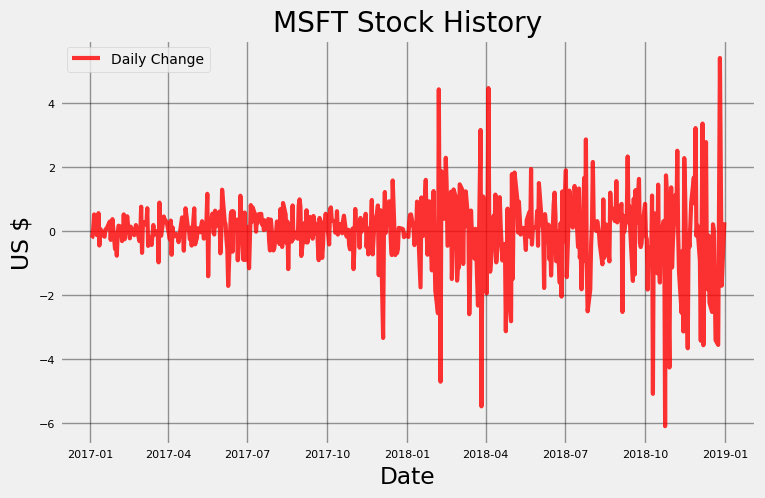

In [24]:
stock.plot_stock(stats=['Daily Change'])

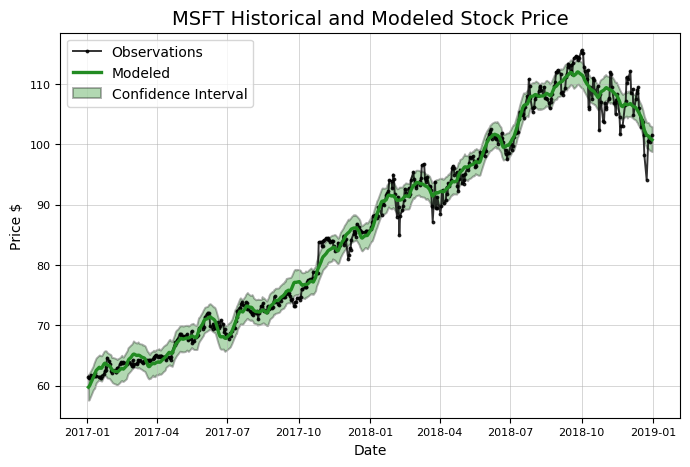

In [25]:
model, model_data = stock.create_prophet_model()

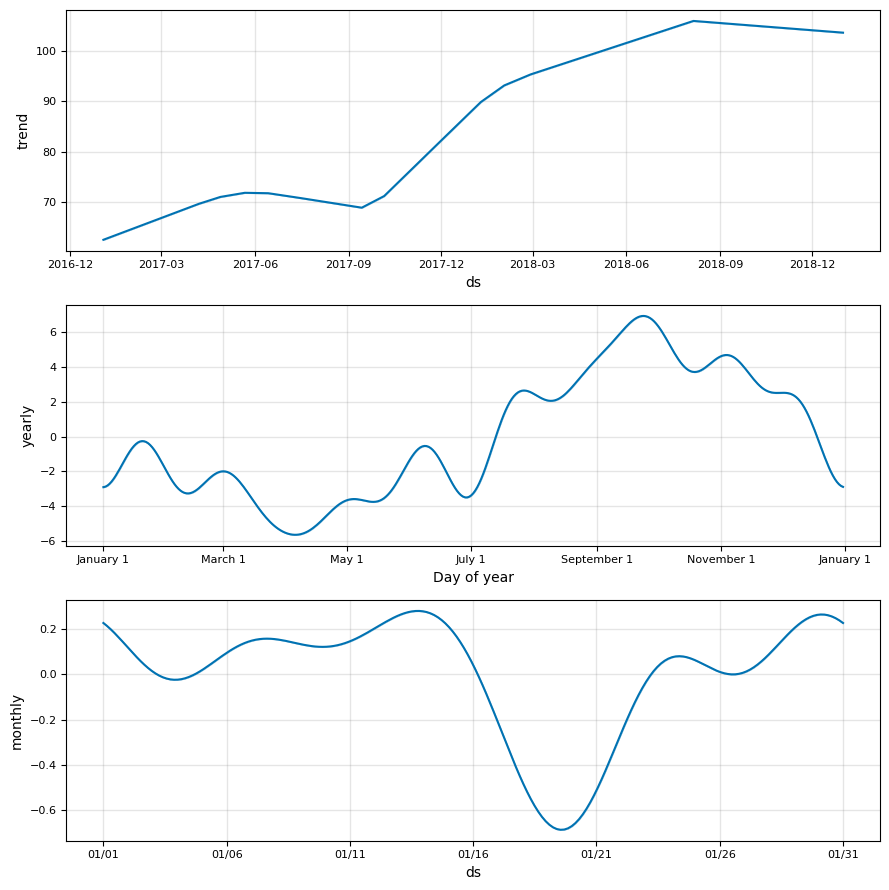

In [26]:
model.plot_components(model_data)
plt.show()

Predicted Price on 2019-03-31 00:00:00 = $96.65


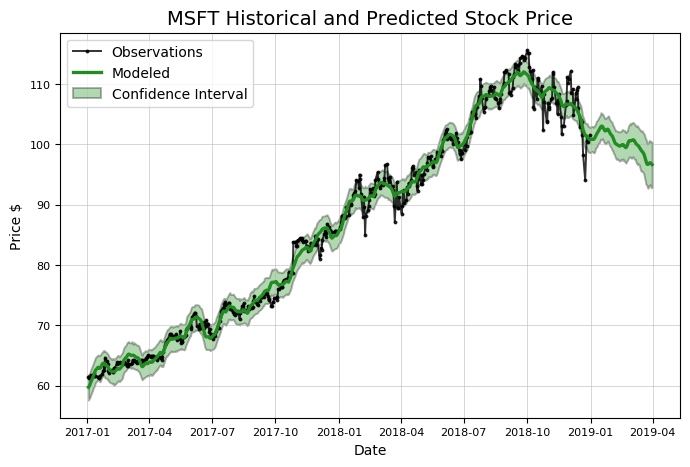

In [27]:
model, model_data = stock.create_prophet_model(days=90)


Prediction Range: 2017-12-31 00:00:00 to 2018-12-31 00:00:00.

Predicted price on 2018-12-29 00:00:00 = $109.44.
Actual price on    2018-12-28 00:00:00 = $100.39.

Average Absolute Error on Training Data = $0.55.
Average Absolute Error on Testing  Data = $6.78.

When the model predicted an increase, the price increased 54.91% of the time.
When the model predicted a  decrease, the price decreased  44.74% of the time.

The actual value was within the 80% confidence interval 6.00% of the time.


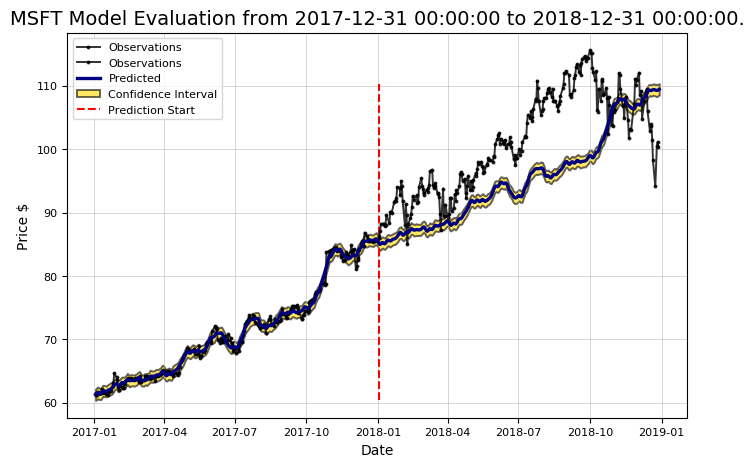

In [28]:
stock.evaluate_prediction()

%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>